In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

df = pd.read_csv(r"C:\Users\BAPS\Downloads\customer_segmentation.csv")
df.head()

,CustomerID,Age,Gender,ItemPurchased,Category,PurchaseAmountUSD,Location,Size,Color,Season,ReviewRating,SubscriptionStatus,ShippingType,DiscountApplied,PromoCodeUsed,PreviousPurchases,PaymentMethod,FrequencyOfPurchases
0,1,56,Male,Bag,Accessories,374.86,New York,L,Red,Fall,3,No,Standard,Yes,No,7,PayPal,Fortnightly
1,2,46,Male,Shoes,Home Decor,33.28,Los Angeles,S,Black,Spring,2,No,Express,Yes,No,3,UPI,Weekly
2,3,32,Female,Laptop,Home Decor,117.45,Houston,S,Black,Fall,4,No,Standard,Yes,Yes,13,UPI,Monthly
3,4,60,Male,Bag,Home Decor,356.05,Chicago,M,Green,Summer,2,Yes,Express,No,No,14,PayPal,Weekly
4,5,25,Female,Laptop,Accessories,393.50,Houston,M,Black,Winter,2,Yes,Express,No,No,5,Cash,Fortnightly


In [65]:
print("Shape:", df.shape)
df.info()

Shape: (3900, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            3900 non-null   int64  
 1   Age                   3900 non-null   int64  
 2   Gender                3900 non-null   object 
 3   ItemPurchased         3900 non-null   object 
 4   Category              3900 non-null   object 
 5   PurchaseAmountUSD     3900 non-null   float64
 6   Location              3900 non-null   object 
 7   Size                  3900 non-null   object 
 8   Color                 3900 non-null   object 
 9   Season                3900 non-null   object 
 10  ReviewRating          3900 non-null   int64  
 11  SubscriptionStatus    3900 non-null   object 
 12  ShippingType          3900 non-null   object 
 13  DiscountApplied       3900 non-null   object 
 14  PromoCodeUsed         3900 non-null   object 
 15  Pre

### Exploretery Data Analysis

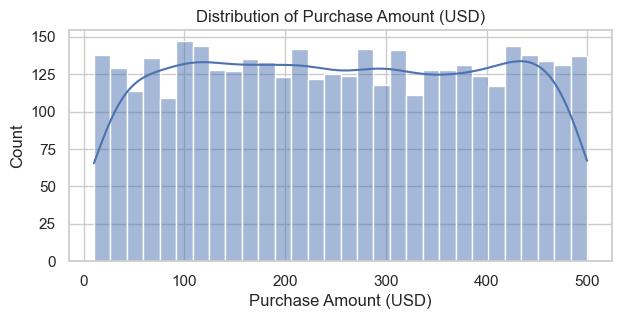

In [66]:
plt.figure(figsize=(7, 3))
sns.histplot(df['PurchaseAmountUSD'], bins=30, kde=True)
plt.title("Distribution of Purchase Amount (USD)")
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Count")
plt.show()   ### Identify high-value customers & skewness in spending.

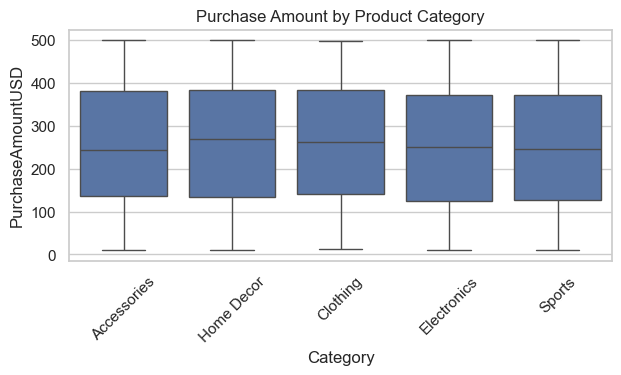

In [67]:
plt.figure(figsize=(7,3))
sns.boxplot(x='Category', y='PurchaseAmountUSD', data=df)
plt.xticks(rotation=45)
plt.title("Purchase Amount by Product Category")
plt.show() ### which category generate higher spending

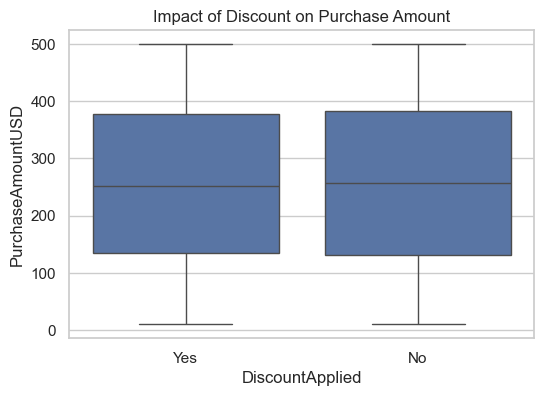

In [68]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='DiscountApplied', y="PurchaseAmountUSD", data=df)
plt.title("Impact of Discount on Purchase Amount")
plt.show()

C:\Users\BAPS\AppData\Local\Temp\ipykernel_8488\297026024.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='PurchaseAmountUSD', hue='DiscountApplied', data=df, ci=None)


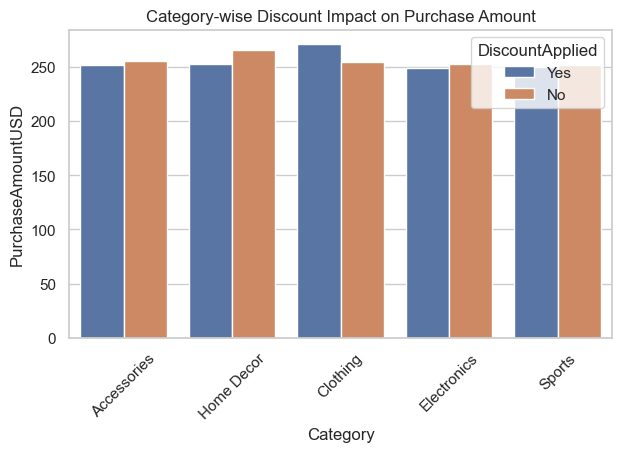

In [69]:
plt.figure(figsize=(7,4))
sns.barplot(x='Category', y='PurchaseAmountUSD', hue='DiscountApplied', data=df, ci=None)
plt.xticks(rotation=45)
plt.title("Category-wise Discount Impact on Purchase Amount")
plt.show()   ###Identify categories where discounts increase purchase value

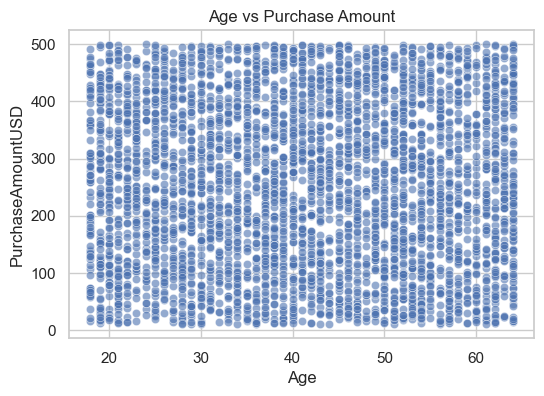

In [70]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='PurchaseAmountUSD', data=df, alpha=0.6)
plt.title("Age vs Purchase Amount")
plt.show()   

In [71]:
### creating age groups

bins = [0, 25, 35, 45, 55, 100]
labels = ['<25', '25-35', '35-45', '45-55', '55+']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

C:\Users\BAPS\AppData\Local\Temp\ipykernel_8488\711865337.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AgeGroup', y='PurchaseAmountUSD', data=df, ci=None)


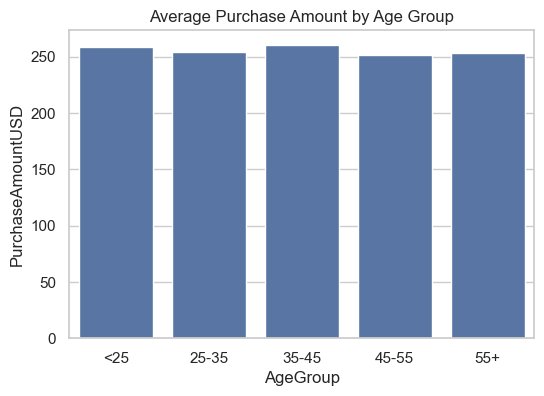

In [72]:
plt.figure(figsize=(6,4))
sns.barplot(x='AgeGroup', y='PurchaseAmountUSD', data=df, ci=None)
plt.title("Average Purchase Amount by Age Group")
plt.show()

C:\Users\BAPS\AppData\Local\Temp\ipykernel_8488\3622700843.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SubscriptionStatus', y='PurchaseAmountUSD', data=df, ci=None)


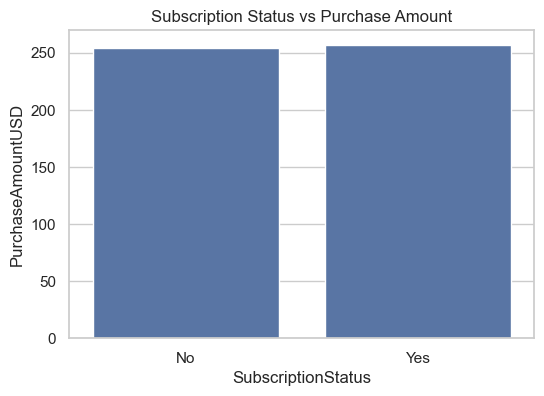

In [73]:
plt.figure(figsize=(6,4))
sns.barplot(x='SubscriptionStatus', y='PurchaseAmountUSD', data=df, ci=None)
plt.title("Subscription Status vs Purchase Amount")
plt.show()   ### Check if subscribers are higher-value customers.

C:\Users\BAPS\AppData\Local\Temp\ipykernel_8488\2578437961.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='FrequencyOfPurchases', y='PurchaseAmountUSD', data=df, ci=None)


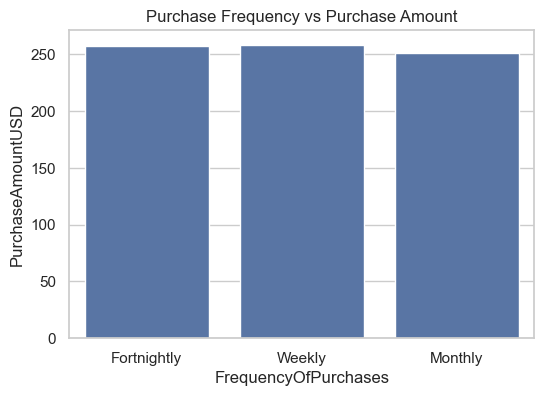

In [74]:
plt.figure(figsize=(6,4))
sns.barplot(x='FrequencyOfPurchases', y='PurchaseAmountUSD', data=df, ci=None)
plt.title("Purchase Frequency vs Purchase Amount")
plt.show()

C:\Users\BAPS\AppData\Local\Temp\ipykernel_8488\3168837572.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Season', y='PurchaseAmountUSD', data=df, ci=None)


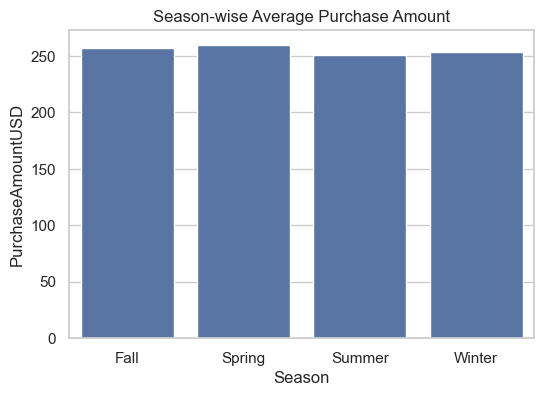

In [75]:
plt.figure(figsize=(6,4))
sns.barplot(x='Season', y='PurchaseAmountUSD', data=df, ci=None)
plt.title("Season-wise Average Purchase Amount")
plt.show()

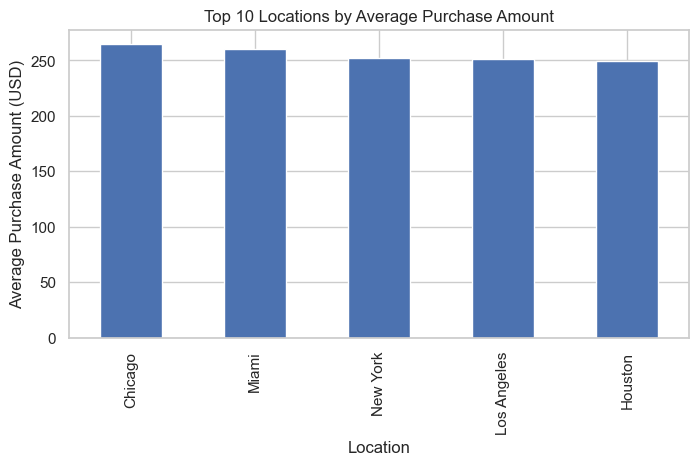

In [76]:
top_locations = (
    df.groupby('Location')['PurchaseAmountUSD']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(8,4))
top_locations.plot(kind='bar')
plt.title("Top 10 Locations by Average Purchase Amount")
plt.ylabel("Average Purchase Amount (USD)")
plt.show()

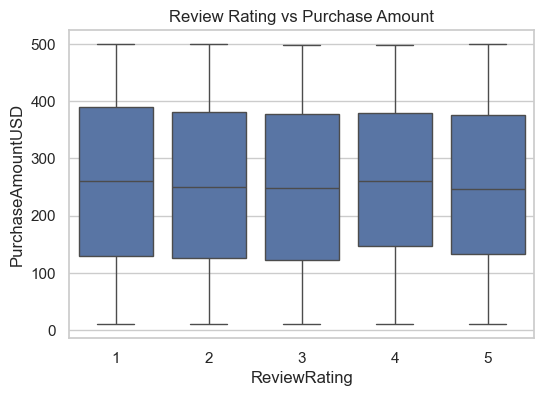

In [77]:
plt.figure(figsize=(6,4))
sns.boxplot(x='ReviewRating', y='PurchaseAmountUSD', data=df)
plt.title("Review Rating vs Purchase Amount")
plt.show()

In [78]:
df.groupby('DiscountApplied')['PurchaseAmountUSD'].mean()

DiscountApplied
No     255.830729
Yes    255.113258
Name: PurchaseAmountUSD, dtype: float64

In [79]:
df.groupby('SubscriptionStatus')['PurchaseAmountUSD'].mean()

SubscriptionStatus
No     254.081102
Yes    256.909948
Name: PurchaseAmountUSD, dtype: float64

In [80]:
df.groupby('Category')['PurchaseAmountUSD'].mean().sort_values(ascending=False)

Category
Clothing       262.280188
Home Decor     259.210303
Accessories    253.735366
Sports         251.141516
Electronics    250.884093
Name: PurchaseAmountUSD, dtype: float64

In [81]:
df

,CustomerID,Age,Gender,ItemPurchased,Category,PurchaseAmountUSD,Location,Size,Color,Season,ReviewRating,SubscriptionStatus,ShippingType,DiscountApplied,PromoCodeUsed,PreviousPurchases,PaymentMethod,FrequencyOfPurchases,AgeGroup
0,1,56,Male,Bag,Accessories,374.86,New York,L,Red,Fall,3,No,Standard,Yes,No,7,PayPal,Fortnightly,55+
1,2,46,Male,Shoes,Home Decor,33.28,Los Angeles,S,Black,Spring,2,No,Express,Yes,No,3,UPI,Weekly,45-55
2,3,32,Female,Laptop,Home Decor,117.45,Houston,S,Black,Fall,4,No,Standard,Yes,Yes,13,UPI,Monthly,25-35
3,4,60,Male,Bag,Home Decor,356.05,Chicago,M,Green,Summer,2,Yes,Express,No,No,14,PayPal,Weekly,55+
4,5,25,Female,Laptop,Accessories,393.50,Houston,M,Black,Winter,2,Yes,Express,No,No,5,Cash,Fortnightly,<25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,39,Female,Football,Home Decor,41.30,Houston,XL,Green,Spring,4,Yes,Express,No,Yes,9,UPI,Monthly,35-45
3896,3897,50,Male,T-Shirt,Sports,184.64,Los Angeles,XL,Blue,Fall,4,No,Express,No,Yes,5,Debit Card,Fortnightly,45-55
3897,3898,53,Female,Shoes,Sports,304.53,Los Angeles,L,Blue,Summer,2,No,Standard,Yes,Yes,13,PayPal,Fortnightly,45-55
3898,3899,62,Female,Watch,Clothing,282.50,Miami,L,White,Winter,1,Yes,Standard,No,Yes,12,Cash,Weekly,55+


### clustering

In [82]:

### clustering

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [84]:
### Convert Yes/No columns
df['SubscriptionStatus'] = df['SubscriptionStatus'].map({'Yes': 1, 'No': 0})
df['DiscountApplied'] = df['DiscountApplied'].map({'Yes': 1, 'No': 0})

In [86]:
### Encode purchase frequency
freq_map = {
    'Weekly': 4,
    'Fortnightly': 3,
    'Monthly': 2,
    'Quarterly': 1
}

df['FrequencyOfPurchases'] = df['FrequencyOfPurchases'].map(freq_map)

In [87]:
cluster_df = df[[
    'Age',
    'PurchaseAmountUSD',
    'PreviousPurchases',
    'ReviewRating',
    'SubscriptionStatus',
    'DiscountApplied',
    'FrequencyOfPurchases'
]]

cluster_df.head()

,Age,PurchaseAmountUSD,PreviousPurchases,ReviewRating,SubscriptionStatus,DiscountApplied,FrequencyOfPurchases
0,56,374.86,7,3,0,1,3
1,46,33.28,3,2,0,1,4
2,32,117.45,13,4,0,1,2
3,60,356.05,14,2,1,0,4
4,25,393.50,5,2,1,0,3


In [88]:
cluster_df.isnull().sum()

Age                     0
PurchaseAmountUSD       0
PreviousPurchases       0
ReviewRating            0
SubscriptionStatus      0
DiscountApplied         0
FrequencyOfPurchases    0
dtype: int64

In [89]:
### Apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_df)

In [90]:
### Find Optimal K (Elbow Method)
inertia = []
K_range = range(2, 9)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

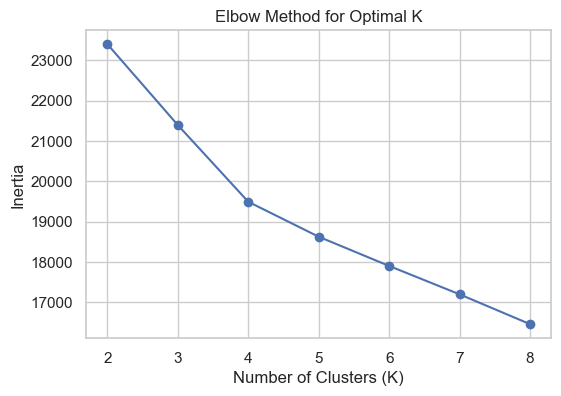

In [91]:
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [92]:
### Silhouette Score Validation
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f"K = {k} → Silhouette Score = {score:.3f}")

K = 2 → Silhouette Score = 0.147
K = 3 → Silhouette Score = 0.132
K = 4 → Silhouette Score = 0.171
K = 5 → Silhouette Score = 0.145


In [93]:
### applying final k means model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)

In [94]:
df['Cluster'].value_counts()

Cluster
0    1897
2    1003
1    1000
Name: count, dtype: int64

In [95]:
### Cluster Profiling
cluster_profile = df.groupby('Cluster')[[
    'Age',
    'PurchaseAmountUSD',
    'PreviousPurchases',
    'ReviewRating',
    'SubscriptionStatus',
    'DiscountApplied',
    'FrequencyOfPurchases'
]].mean()

cluster_profile

,Age,PurchaseAmountUSD,PreviousPurchases,ReviewRating,SubscriptionStatus,DiscountApplied,FrequencyOfPurchases
Cluster,,,,,,,
0,41.250395,255.113258,6.890353,3.054296,0.490775,1.0,2.983658
1,41.149000,254.303380,7.010000,2.995000,1.000000,0.0,3.012000
2,41.150548,257.353509,6.948156,3.030907,0.000000,0.0,3.007976


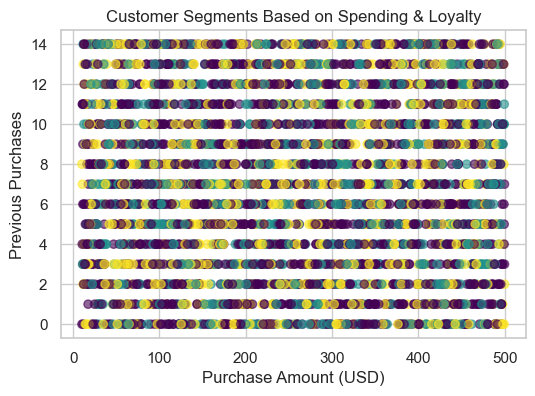

In [96]:
### Visualize Clusters
plt.figure(figsize=(6,4))
plt.scatter(
    df['PurchaseAmountUSD'],
    df['PreviousPurchases'],
    c=df['Cluster'],
    cmap='viridis',
    alpha=0.6
)
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Previous Purchases")
plt.title("Customer Segments Based on Spending & Loyalty")
plt.show()

### Interpret & Name Clusters
Cluster 0 – High-Value Loyal Customers
            High spending
            High frequency
            Mostly subscribers
            Low discount dependency

Cluster 1 – Price-Sensitive Customers
            Medium spending
            High discount usage
            Respond to promo codes

Cluster 2 – Occasional Buyers
            Low spending
            Low frequency
            No subscription

In [97]:
df

,CustomerID,Age,Gender,ItemPurchased,Category,PurchaseAmountUSD,Location,Size,Color,Season,ReviewRating,SubscriptionStatus,ShippingType,DiscountApplied,PromoCodeUsed,PreviousPurchases,PaymentMethod,FrequencyOfPurchases,AgeGroup,Cluster
0,1,56,Male,Bag,Accessories,374.86,New York,L,Red,Fall,3,0,Standard,1,No,7,PayPal,3,55+,0
1,2,46,Male,Shoes,Home Decor,33.28,Los Angeles,S,Black,Spring,2,0,Express,1,No,3,UPI,4,45-55,0
2,3,32,Female,Laptop,Home Decor,117.45,Houston,S,Black,Fall,4,0,Standard,1,Yes,13,UPI,2,25-35,0
3,4,60,Male,Bag,Home Decor,356.05,Chicago,M,Green,Summer,2,1,Express,0,No,14,PayPal,4,55+,1
4,5,25,Female,Laptop,Accessories,393.50,Houston,M,Black,Winter,2,1,Express,0,No,5,Cash,3,<25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,39,Female,Football,Home Decor,41.30,Houston,XL,Green,Spring,4,1,Express,0,Yes,9,UPI,2,35-45,1
3896,3897,50,Male,T-Shirt,Sports,184.64,Los Angeles,XL,Blue,Fall,4,0,Express,0,Yes,5,Debit Card,3,45-55,2
3897,3898,53,Female,Shoes,Sports,304.53,Los Angeles,L,Blue,Summer,2,0,Standard,1,Yes,13,PayPal,3,45-55,0
3898,3899,62,Female,Watch,Clothing,282.50,Miami,L,White,Winter,1,1,Standard,0,Yes,12,Cash,4,55+,1


In [ ]:
df.to_csv("final_customer_segmentation_with_clusters.csv", index=False)

In [99]:
type(df)

pandas.core.frame.DataFrame

In [100]:
df.shape

(3900, 20)

In [101]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'ItemPurchased', 'Category',
       'PurchaseAmountUSD', 'Location', 'Size', 'Color', 'Season',
       'ReviewRating', 'SubscriptionStatus', 'ShippingType', 'DiscountApplied',
       'PromoCodeUsed', 'PreviousPurchases', 'PaymentMethod',
       'FrequencyOfPurchases', 'AgeGroup', 'Cluster'],
      dtype='object')

In [102]:
import os
os.getcwd()

'C:\\Users\\BAPS\\Documents'